In [1]:
import numpy as np
import scipy as sci
from scipy.fft import fft, fftfreq
from scipy.fft import ifft, fftfreq
from scipy.fft import fft2, fftfreq
from scipy.fft import ifft2, fftfreq
from matplotlib import pyplot as plt

## Fourier Transform

The fourier transformation (FT) is a reversable transformation that can be applied to a function to convert it from position space to frequency space. Being a very useful tool alowing one to determine the frequencies are present in a function. The FT will create a complex function of frequency from the function of space, as seen in the equation for FT: 
\begin{equation}
f(\omega) = \int_{-∞}^{∞}f(x)e^{-i2\pi\omega x}
\end{equation}
While this is a continuous function, the main method used for computing as demonstrated here is through summation and evaluating discrete part, through a Discrete Fourier Transform (DFT). This is called through the Fast Fourier Transform (fft) with the Scipy repository.

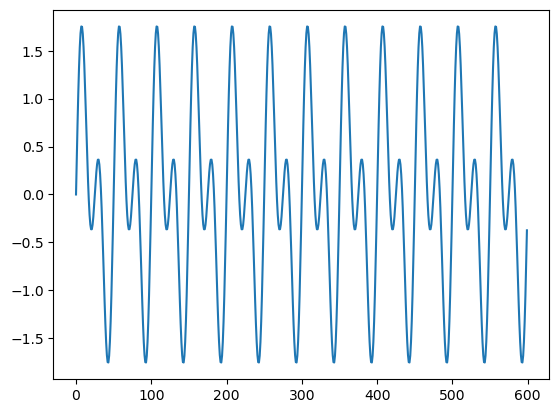

In [2]:
# Generate sine waves and add them together

def sine_wave(freq, rate, duration):
    x = np.linspace(0, duration, rate * duration, endpoint=False)
    frequencies = x * freq
    y = np.sin((2 * np.pi) * frequencies)
    return y

wave_1 = sine_wave(2, 100, 6)
wave_2 = sine_wave(4, 100, 6)

c_wave = wave_1 + wave_2

plt.plot(c_wave)
plt.show()

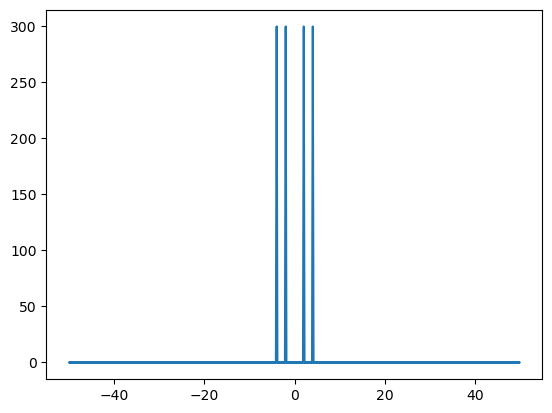

In [3]:
#Plot frequency space by taking the forier transfrom of the c-wave function

N = 600

yf = fft(c_wave)
xf = fftfreq(N, 1 / 100)

plt.plot(xf, np.abs(yf))
plt.show()

# 1D Sky

Radio antennas work by directly measuring the electric field of sky sources. We can use the principle of the FT to see what the the electric field will look like in the ground domain from the sky domain as seen in this equation:
\begin{equation}
E(r, t) = \int E(\theta, t)e^{-i2\pi \theta\cdot r/\lambda}
\end{equation}
Now that the E-field is expressed in the ground domain, we have a usable expression to use with the antenna array to find what the reulted observed sky is. In this case, sky sources and antenna positions are expressed by 1D arrays. Take the fft of the sky array and multiply it with the antenna array then take the inverse fft (ifft) to get the observed sky. Normally to understand how one function affects the other one would take the convolution of the two, but in this instance we can avoid doing this by using convolution therom expressed in this equation:
\begin{equation}
f(\theta)\ast g(\theta) = F^{-1}(F(r)\cdot G(r))
\end{equation}
The convultion in one domain is equal to the FT of the same functions multipled in another domain.

### Perfect Antenna

/Users/mr2980/miniconda3/envs/scratch/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


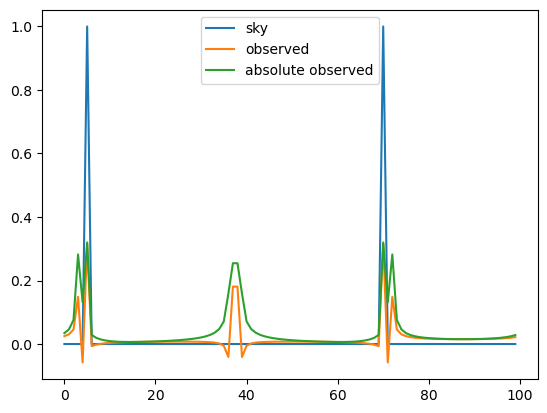

In [4]:
#Create a sky array of 2 sources
nums= np.zeros(100)
nums[70] = 1
nums[5] = 1
sky = nums

#Create an antenna array
antenna = np.zeros(100)
antenna[::3] = 1

#Take fft of sky then multiply it with the antenna array 
sky_fft = fft(sky)
ground = sky_fft*antenna

#Take ifft to convert back to the sky domain to see what the observed sky is
observed = ifft(ground)

plt.plot(sky, label = "sky")
plt.plot(observed, label = "observed")
plt.plot(np.abs(observed), label = "absolute observed")
plt.legend()
plt.show()

### Imperfect Antenna

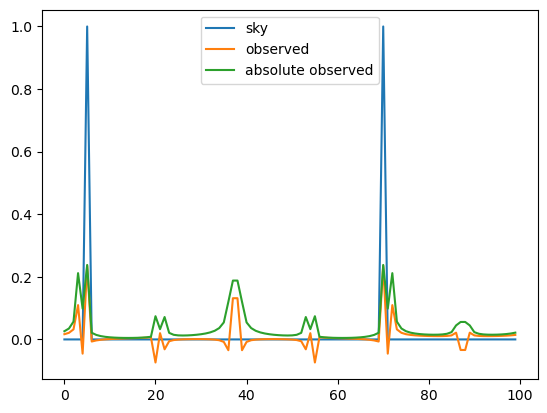

In [5]:
# Some antenna are now values of 0.5
antenna[::6] = .5

sky_fft = fft(sky)
ground = sky_fft*antenna
observed = ifft(ground)
plt.plot(sky, label = "sky")
plt.plot(observed, label = "observed")
plt.plot(np.abs(observed), label = "absolute observed")
plt.legend()
plt.show()

# 2D Sky

The Fourier transformation can also be applied in an arbitrary amount of dimensions. In the case, it will be 2 dimensions, much more akin to what one would see in the actual sky. This first example shows what a simple sky with two sources looks like in the sky domain and then the ground domain.

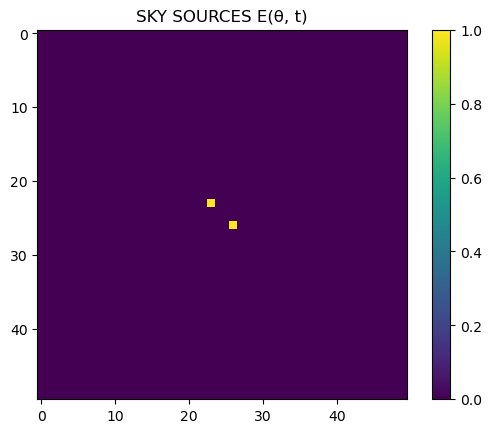

In [6]:
#Create sky of 2 sources
nums = np.zeros((50,50))
nums[23,23] = 1
nums[26,26] = 1
sky = nums

#Take fft2 (2D fft) to get it in the ground domain
sky_fft2 = fft2(sky)

plt.imshow(sky, interpolation="nearest", origin="upper")
plt.colorbar()
plt.title("SKY SOURCES E(θ, t)")
plt.show()

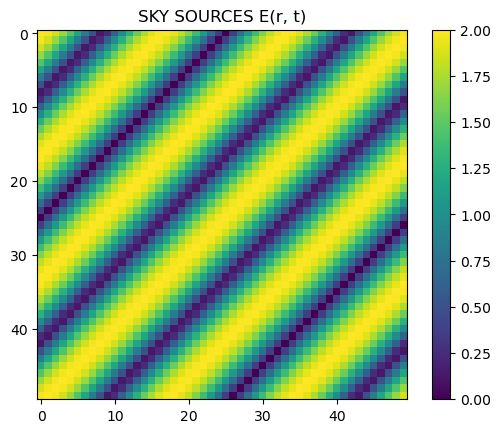

In [7]:
plt.imshow(np.abs(sky_fft2), interpolation="nearest", origin="upper")
plt.colorbar()
plt.title("SKY SOURCES E(r, t)")
plt.show()

Now it would be useful to look a a slightly more complex sky with more point sources to observe and a series of theoretical antenna arrays and see how these affect observation.

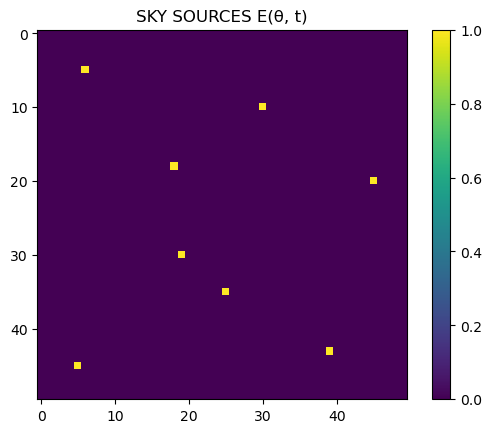

In [8]:
#Create sky with 8 sources
nums = np.zeros((50,50))
nums[10,30] = 1
nums[30,19] = 1
nums[5,6] = 1
nums[35,25] = 1
nums[20,45] = 1
nums[45,5] = 1
nums[18,18] = 1
nums[43, 39] = 1
sky = nums

#fft2 to get ground domain
sky_fft2 = fft2(sky)


plt.imshow(sky, interpolation="nearest", origin="upper")
plt.colorbar()
plt.title("SKY SOURCES E(θ, t)")
plt.show()

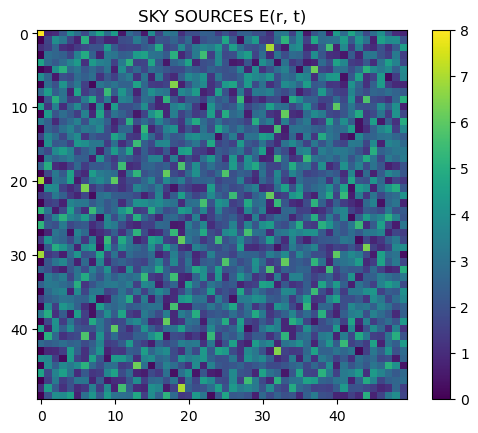

In [9]:
plt.imshow(np.abs(sky_fft2), interpolation="nearest", origin="upper")
plt.colorbar()
plt.title("SKY SOURCES E(r, t)")
plt.show()

[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


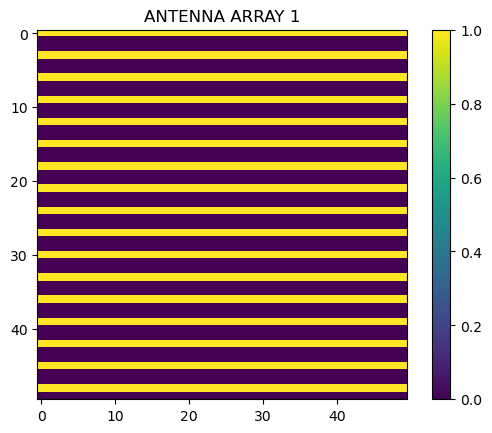

In [10]:
antenna = np.zeros((50,50))
antenna[::3] = 1
print(antenna)
sky_fft2 = fft2(sky)
ground = sky_fft2*antenna
observed = ifft2(ground)

plt.imshow(antenna, interpolation="nearest", origin="upper")
plt.colorbar()
plt.title("ANTENNA ARRAY 1")
plt.show()

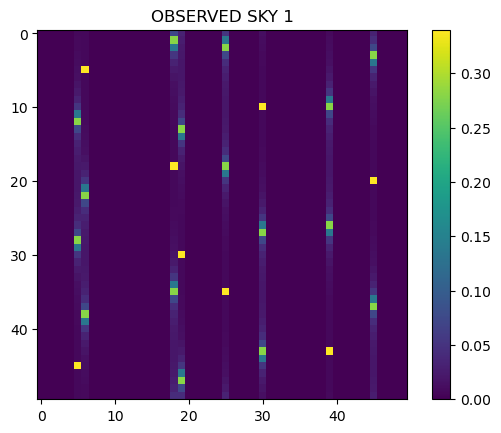

In [11]:
plt.imshow(np.abs(observed), interpolation="nearest", origin="upper")
plt.colorbar()
plt.title("OBSERVED SKY 1")
plt.show()

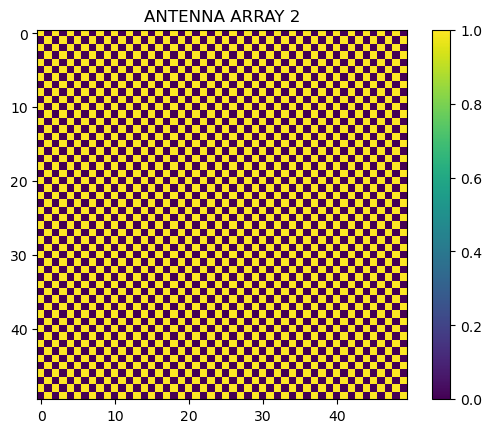

In [12]:
ar = np.zeros(50)
ar[::2] = 1
ar_inv = np.flip(ar)
antenna = np.zeros(50)
antenna[::2] = 1
for i in range(len(ar)-1):
    ar = np.flip(ar)
    antenna = np.vstack((antenna, ar))
sky_fft2 = fft2(sky)
ground = sky_fft2*antenna
observed = ifft2(ground)
plt.imshow(antenna, interpolation="nearest", origin="upper")
plt.colorbar()
plt.title("ANTENNA ARRAY 2")
plt.show()

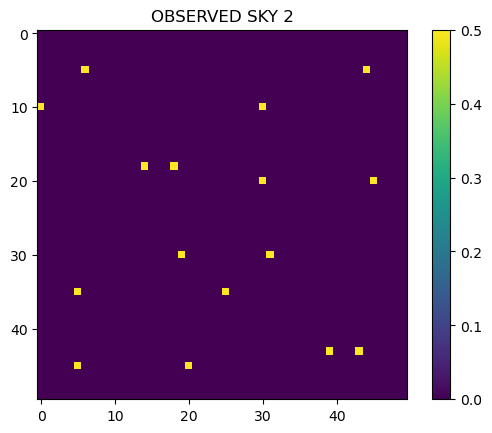

In [13]:
plt.imshow(np.abs(observed), interpolation="nearest", origin="upper")
plt.colorbar()
plt.title("OBSERVED SKY 2")
plt.show()

Up until now it was a little unrealistic on how the antenna array where being depicted, with a large quantity of them and them being single points/pixels. In this next example, we expand the size of these components to a more realistic, top-hat response on the ground. This one is specifically modeled around the design of the Murchison Widefield Array (MWA).

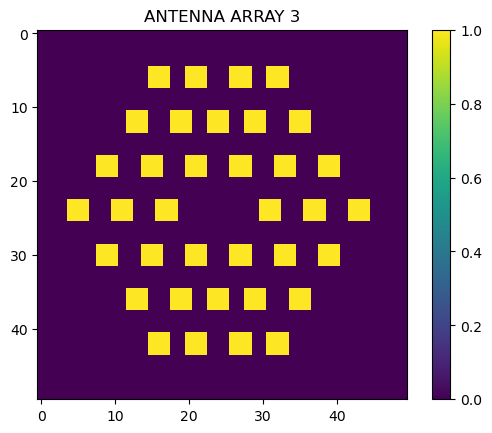

In [14]:
#Create more complex antenna array
antenna = np.zeros((50,50))

antenna[23,np.array([5, 11, 17, 31, 37, 43])] = 1
antenna[23,np.array([4,6,10,12,16,18,30,32,36,38,42,44])] = 1
antenna[24,np.array([4,5,6,10,11,12,16,17,18,30,31,32,36,37,38,42,43,44])] = 1
antenna[25,np.array([4,5,6,10,11,12,16,17,18,30,31,32,36,37,38,42,43,44])] = 1

antenna[18,np.array([9, 15, 21, 27, 33, 39])] = 1
antenna[18,np.array([8,10,14,16,20,22,26,28,32,34,38,40])] = 1
antenna[19,np.array([8,9,10,14,15,16,20,21,22,26,27,28,32,33,34,38,39,40])] = 1
antenna[17,np.array([8,9,10,14,15,16,20,21,22,26,27,28,32,33,34,38,39,40])] = 1

antenna[12,np.array([13, 19, 24, 29, 35])] = 1
antenna[12,np.array([12,14,18,20,23,25,28,30,34,36])] = 1
antenna[13,np.array([12,13,14,18,19,20,23,24,25,28,29,30,34,35,36])] = 1
antenna[11,np.array([12,13,14,18,19,20,23,24,25,28,29,30,34,35,36])] = 1

antenna[6,np.array([16, 21, 27, 32])] = 1
antenna[6,np.array([15,17,20,22,26,28,31,33])] = 1
antenna[5,np.array([15,16,17,20,21,22,26,27,28,31,32,33])] = 1
antenna[7,np.array([15,16,17,20,21,22,26,27,28,31,32,33])] = 1

antenna[30,np.array([9, 15, 21, 27, 33, 39])] = 1
antenna[30,np.array([8,10,14,16,20,22,26,28,32,34,38,40])] = 1
antenna[31,np.array([8,9,10,14,15,16,20,21,22,26,27,28,32,33,34,38,39,40])] = 1
antenna[29,np.array([8,9,10,14,15,16,20,21,22,26,27,28,32,33,34,38,39,40])] = 1

antenna[36,np.array([13, 19, 24, 29, 35])] = 1
antenna[36,np.array([12,14,18,20,23,25,28,30,34,36])] = 1
antenna[37,np.array([12,13,14,18,19,20,23,24,25,28,29,30,34,35,36])] = 1
antenna[35,np.array([12,13,14,18,19,20,23,24,25,28,29,30,34,35,36])] = 1

antenna[42,np.array([16, 21, 27, 32])] = 1
antenna[42,np.array([15,17,20,22,26,28,31,33])] = 1
antenna[43,np.array([15,16,17,20,21,22,26,27,28,31,32,33])] = 1
antenna[41,np.array([15,16,17,20,21,22,26,27,28,31,32,33])] = 1

sky_fft2 = fft2(sky)
ground = sky_fft2*antenna
observed = ifft2(ground)
plt.imshow(antenna, interpolation="nearest", origin="upper")
plt.colorbar()
plt.title("ANTENNA ARRAY 3")
plt.show()

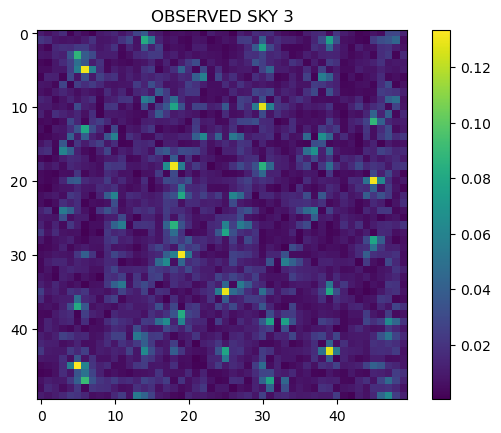

In [15]:
plt.imshow(np.abs(observed), interpolation="nearest", origin="upper")
plt.colorbar()
plt.title("OBSERVED SKY 3")
plt.show()